## Applying CNN on CIFAR-10 dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.10.0


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

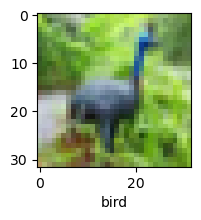

In [28]:
plot_sample(X_train, y_train,6)

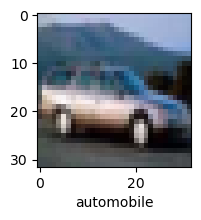

In [27]:
plot_sample(X_train, y_train, 4)

## Normalization

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Trying out ANN (just for performance comparison)

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Metal device set to: Apple M1


2022-11-30 14:55:04.421320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 14:55:04.422138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2022-11-30 14:55:05.938025: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 14:55:06.074825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 13ms/step - loss: 1.8118 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6232 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5414 - accuracy: 0.4584
Epoch 4/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4840 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4334 - accuracy: 0.4956


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

 28/313 [=>............................] - ETA: 1s

2022-11-30 14:56:53.129871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48      1000
           1       0.65      0.36      0.46      1000
           2       0.30      0.50      0.38      1000
           3       0.38      0.31      0.34      1000
           4       0.55      0.23      0.33      1000
           5       0.53      0.23      0.32      1000
           6       0.45      0.67      0.54      1000
           7       0.67      0.40      0.50      1000
           8       0.67      0.50      0.57      1000
           9       0.31      0.85      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.52      0.44      0.44     10000
weighted avg       0.52      0.44      0.44     10000



## Now applying CNN

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2022-11-30 14:57:08.196126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.4610 - accuracy: 0.4720
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1191 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9853 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9020 - accuracy: 0.6857
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8425 - accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7818 - accuracy: 0.7294
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7368 - accuracy: 0.7467
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6865 - accuracy: 0.7626
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6527 - accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - lo

In [18]:
cnn.evaluate(X_test,y_test)

 19/313 [>.............................] - ETA: 1s - loss: 0.8697 - accuracy: 0.7072

2022-11-30 14:59:52.522877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.9659 - accuracy: 0.6897


[0.9658757448196411, 0.6897000074386597]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 51/313 [===>..........................] - ETA: 0s

2022-11-30 14:59:58.348550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[5.93173609e-04, 3.57859040e-04, 9.39573336e-04, 9.83927548e-01,
        2.21781956e-05, 5.43796783e-03, 3.03996960e-03, 4.74317858e-06,
        5.43925865e-03, 2.37772983e-04],
       [2.76053295e-04, 2.00993270e-02, 4.41338898e-06, 9.03832387e-08,
        3.48545974e-08, 3.06178238e-09, 1.74011461e-09, 1.39776253e-08,
        9.79499400e-01, 1.20750876e-04],
       [2.66561151e-01, 5.21299876e-02, 1.99388247e-03, 6.80229045e-04,
        2.97971055e-05, 2.36007272e-05, 1.61111529e-05, 5.28291625e-04,
        6.73337162e-01, 4.69979411e-03],
       [9.80039418e-01, 6.40877188e-05, 3.59087228e-03, 1.29636115e-04,
        3.08892049e-04, 7.67182883e-07, 5.07445566e-06, 2.37606443e-03,
        1.34790121e-02, 6.18666900e-06],
       [1.46859620e-05, 2.43049653e-04, 4.27860320e-02, 5.75088523e-02,
        1.53454676e-01, 3.90010234e-03, 7.42003560e-01, 3.20562358e-05,
        5.11281069e-05, 5.97929511e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

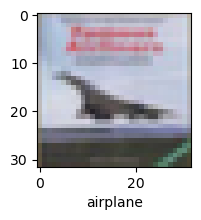

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

## Adding multiple convolution layers and dropout

In [33]:
cnn_3layer = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn_3layer.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn_3layer.fit(X_train, y_train, epochs=10)

Epoch 1/10


2022-11-30 15:14:36.030772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 24s 15ms/step - loss: 1.5511 - accuracy: 0.4344
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1602 - accuracy: 0.5889
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9876 - accuracy: 0.6501
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8818 - accuracy: 0.6895
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8211 - accuracy: 0.7110
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7764 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7405 - accuracy: 0.7389
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7027 - accuracy: 0.7515
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6764 - accuracy: 0.7630
Epoch 10/10
1563/1563 [==============================] - 23s 15ms/step - lo

In [36]:
cnn_3layer.evaluate(X_test,y_test)

  7/313 [..............................] - ETA: 2s - loss: 0.6324 - accuracy: 0.7679 

2022-11-30 15:19:50.296480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.7047 - accuracy: 0.7580


[0.704742431640625, 0.7580000162124634]

In [37]:
y_pred_3layer = cnn_3layer.predict(X_test)
y_pred_3layer[:5]

 35/313 [==>...........................] - ETA: 1s

2022-11-30 15:19:52.738126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


array([[3.7631946e-06, 2.2873894e-06, 2.5864161e-04, 9.5504987e-01,
        7.7668621e-05, 3.6786329e-02, 7.8023672e-03, 5.6989707e-06,
        1.2389562e-05, 9.7088343e-07],
       [7.6543895e-04, 6.3740201e-02, 1.6340582e-06, 7.1374971e-06,
        5.3006790e-08, 1.1117744e-07, 1.1017047e-06, 5.6041949e-09,
        9.3539500e-01, 8.9430738e-05],
       [1.5605459e-01, 4.0671149e-01, 1.5980138e-02, 5.3028353e-03,
        1.2867214e-03, 1.6851991e-03, 8.0304494e-04, 2.4553267e-03,
        3.6557695e-01, 4.4143710e-02],
       [6.0684830e-01, 2.4591768e-01, 4.3426524e-03, 2.6446139e-03,
        3.3053288e-03, 3.2028495e-04, 4.0593552e-03, 7.0576025e-05,
        1.2621900e-01, 6.2722452e-03],
       [1.9519473e-06, 2.7790540e-05, 5.9011187e-03, 8.3864154e-03,
        2.1430461e-02, 3.3609092e-05, 9.6421534e-01, 1.4620268e-07,
        3.1583434e-06, 2.6136750e-08]], dtype=float32)

In [38]:
y_classes_3layer = [np.argmax(element) for element in y_pred_3layer]
y_classes_3layer[:5]

[3, 8, 1, 0, 6]

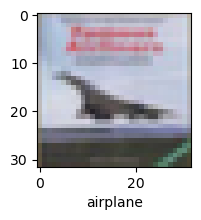

In [60]:
plot_sample(X_test, y_test,3)

In [58]:
classes[y_classes_3layer[3]]

'airplane'

## Adding batch normalization

In [48]:
cnn_bn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn_bn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
cnn_bn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2022-11-30 15:29:52.202580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 26s 16ms/step - loss: 1.4938 - accuracy: 0.4571
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0913 - accuracy: 0.6168
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9468 - accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8648 - accuracy: 0.6973
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8072 - accuracy: 0.7187
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7655 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7295 - accuracy: 0.7453
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6950 - accuracy: 0.7585
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6724 - accuracy: 0.7643
Epoch 10/10
1563/1563 [==============================] - 194s 124ms/step - 

In [51]:
cnn_bn.evaluate(X_test,y_test)

  4/313 [..............................] - ETA: 5s - loss: 0.6279 - accuracy: 0.7734  

2022-11-30 15:43:32.177190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.6900 - accuracy: 0.7614


[0.6899953484535217, 0.761400043964386]

In [52]:
y_pred_bn = cnn_bn.predict(X_test)
y_pred_bn[:5]

 22/313 [=>............................] - ETA: 1s

2022-11-30 15:43:35.855926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


array([[3.0589488e-03, 6.6461373e-04, 2.0979585e-03, 4.4945696e-01,
        1.5962896e-03, 4.6122196e-01, 7.3519491e-02, 6.8077602e-04,
        5.8810818e-03, 1.8219635e-03],
       [8.4070824e-03, 2.3628624e-01, 1.0924556e-05, 1.1889380e-05,
        1.1361929e-06, 7.6065385e-06, 2.0494341e-05, 3.0206201e-07,
        7.5240928e-01, 2.8449614e-03],
       [7.3564172e-02, 2.6531258e-01, 1.5969940e-02, 1.2457612e-02,
        2.1182864e-03, 5.4071946e-03, 4.3267170e-03, 2.5231813e-04,
        5.7232356e-01, 4.8267629e-02],
       [9.0646642e-01, 1.0712330e-02, 4.3577485e-02, 9.5500899e-03,
        1.1089609e-02, 9.0626330e-04, 9.3172712e-04, 9.4912808e-05,
        1.5447846e-02, 1.2234314e-03],
       [6.9034218e-06, 2.1565176e-05, 1.8611524e-02, 9.7276373e-03,
        5.0515544e-02, 3.4730759e-04, 9.2074919e-01, 3.5863588e-06,
        5.7420825e-06, 1.0975299e-05]], dtype=float32)

In [53]:
y_classes_bn = [np.argmax(element) for element in y_pred_bn]
y_classes_bn[:5]

[5, 8, 8, 0, 6]

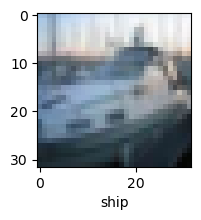

In [65]:
plot_sample(X_test, y_test,2)

In [64]:
classes[y_classes_bn[2]]

'ship'